In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import backend as K
print(K.backend())

tensorflow


In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# Create the model
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [5]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
batch_size = 4
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9077 - loss: 0.2900 - val_accuracy: 0.9863 - val_loss: 0.0438
Epoch 2/15
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9771 - loss: 0.0732 - val_accuracy: 0.9877 - val_loss: 0.0379
Epoch 3/15
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9824 - loss: 0.0559 - val_accuracy: 0.9900 - val_loss: 0.0346
Epoch 4/15
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9845 - loss: 0.0491 - val_accuracy: 0.9875 - val_loss: 0.0423
Epoch 5/15
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9858 - loss: 0.0451 - val_accuracy: 0.9910 - val_loss: 0.0307
Epoch 6/15
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9864 - loss: 0.0412 - val_accuracy: 0.9930 - val_loss: 0.0304
Epoch 7/15
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9873 - loss: 0.0415 - val_accuracy: 0.9910 - val_loss: 0.0366
Epoch 8/15
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0335075706243515
Test accuracy: 0.9908000230789185


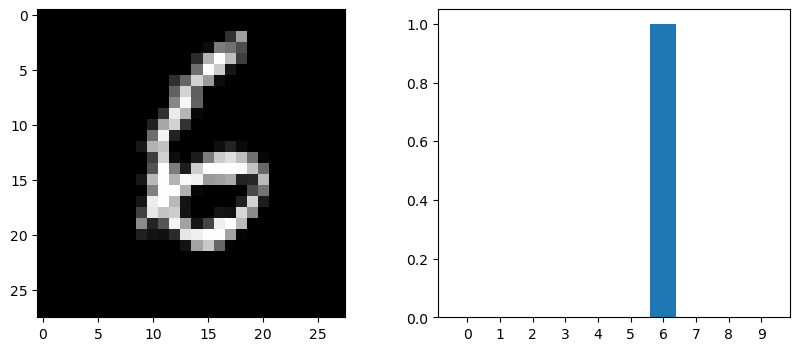

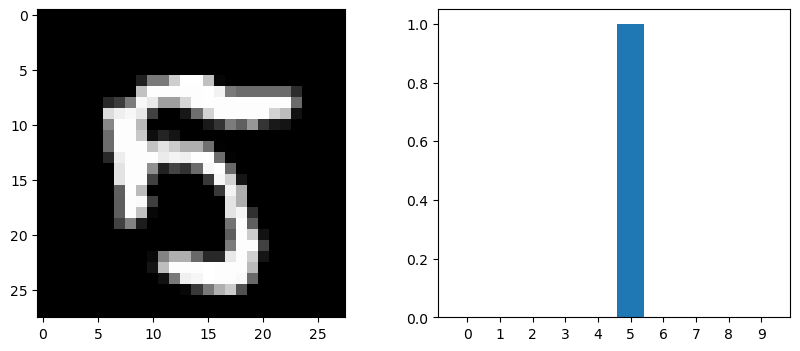

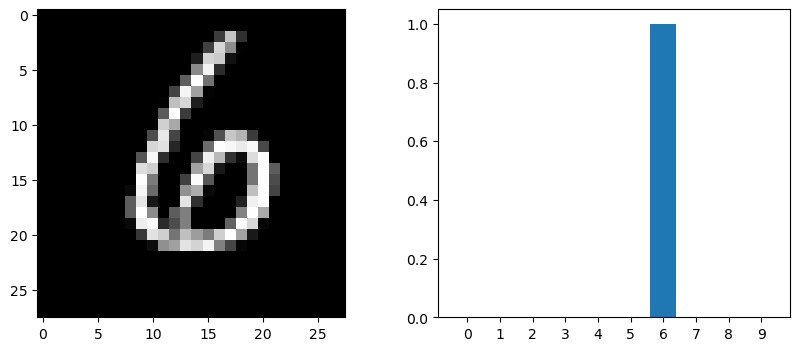

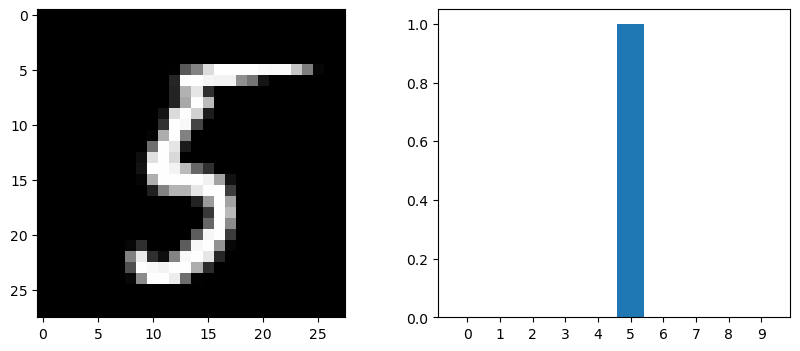

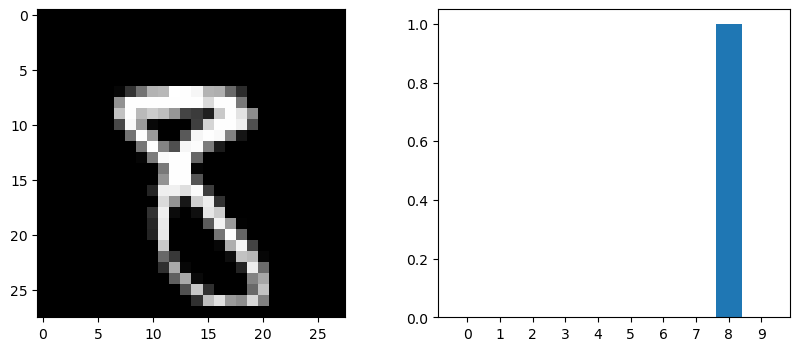

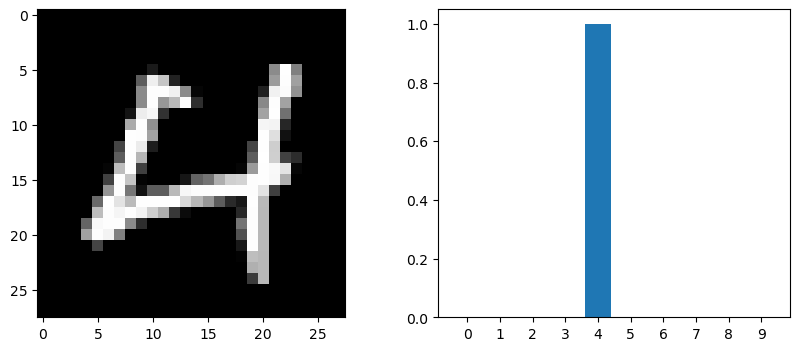

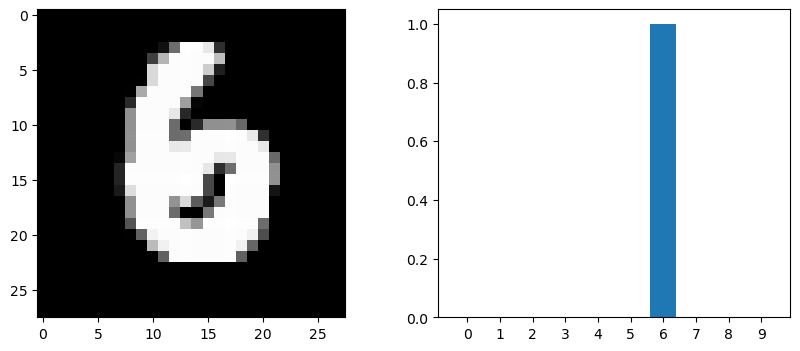

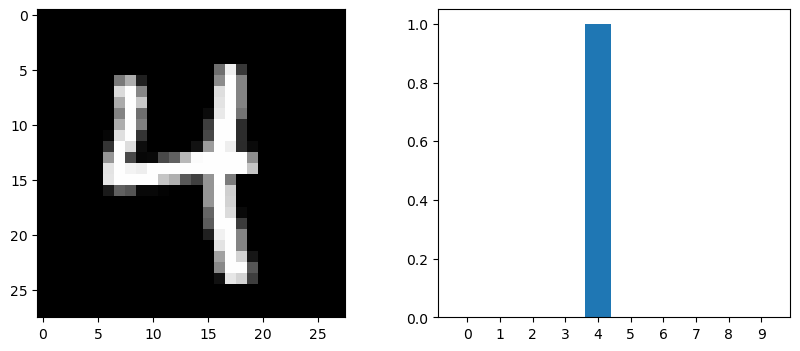

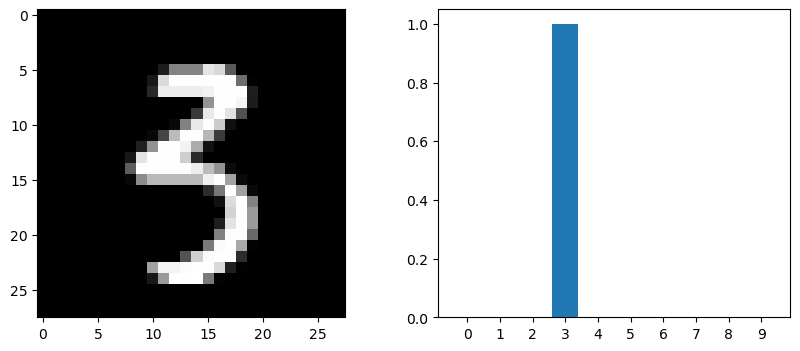

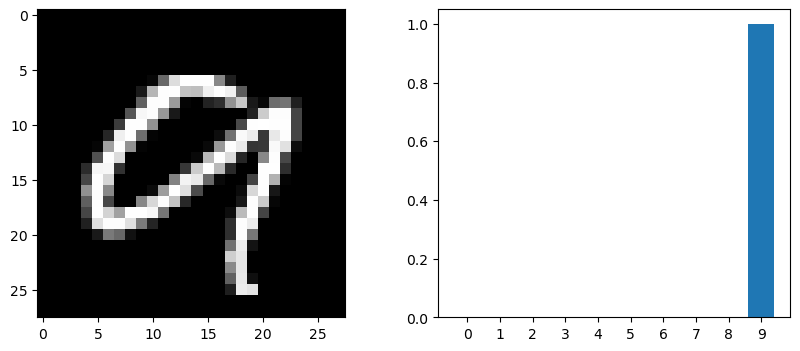

In [8]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((28, 28)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    #plt.bar(ind, y[start+k].cpu().detach().numpy().flatten())   # Pytorch
    plt.bar(ind, y[start+k].numpy().flatten())   # Tensorflow
    plt.xticks(range(10))

In [ ]:
model.save('./mnist_cnn.keras')

In [ ]:
model = keras.models.load_model('mnist_cnn.keras')